# Predicting Housing Prices in King County with Linear ML Models

## Table of Contents

- [Introduction](#introduction)
- [Exploratory Data Analysis](#eda)
- [Observations](#observations)  

## Introduction <a class="anchor" id="introduction"></a>

- In this project we look at housing price data from approx. 21,400 properties from King County in the state of Washington, USA. The data describes properties which were sold in a one-month period in 2015. The dataset is from [Kaggle](https://www.kaggle.com/code/madislemsalu/predicting-housing-prices-in-king-county-usa).

#### Defining the problem
- The client is a real estate agency in the Seattle area. The agency wishes to predict housing prices with a high level of accuracy. The agency is convinced that there is a linear relationship between the features in the dataset and the housing prices, therefore we will only concentrate on finding a Linear Model. 

#### Tools
- The primary libraries used:
    - for Exploratory Data Analysis (EDA): Fast ML, Sweetviz, Dataprep and Matplotlib
    - for ML: Scikit-Learn, Fast ML
    

#### Import Data

In [7]:
!pip install dataprep

  Using cached dataprep-0.4.5-py3-none-any.whl (9.9 MB)
     ---------------------------------------- 0.0/18.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/18.5 MB 2.0 MB/s eta 0:00:10
     --------------------------------------- 0.1/18.5 MB 656.4 kB/s eta 0:00:29
      --------------------------------------- 0.2/18.5 MB 1.9 MB/s eta 0:00:10
      --------------------------------------- 0.4/18.5 MB 2.1 MB/s eta 0:00:09
      --------------------------------------- 0.4/18.5 MB 2.1 MB/s eta 0:00:09
      --------------------------------------- 0.4/18.5 MB 1.7 MB/s eta 0:00:11
     - -------------------------------------- 0.6/18.5 MB 1.8 MB/s eta 0:00:10
     - -------------------------------------- 0.6/18.5 MB 1.7 MB/s eta 0:00:11
     - -------------------------------------- 0.8/18.5 MB 1.9 MB/s eta 0:00:10
     - -------------------------------------- 0.9/18.5 MB 1.9 MB/s eta 0:00:10
     -- ------------------------------------- 0.9/18.5 MB 2.0 MB/s eta 0:00:09
  

In [21]:
# import tool set
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fast_ml import eda
from fast_ml.utilities import display_all
import sweetviz as sv
from dataprep.eda import plot, plot_correlation, create_report
import itertools


In [22]:
# Get data from CSV
def import_data():
    df = pd.read_csv('../data/regression_data.csv', na_values=np.nan)  # encodes missing values so that ML model can handle them
    return df

df = import_data()
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


## Exploratory Data Analysis <a class="anchor" id="eda"></a>

In [23]:
# get overview of data
summary_df = eda.df_info(df)
display_all(summary_df)

,data_type,data_type_grp,num_unique_values,sample_unique_values,num_missing,perc_missing
id,int64,Numerical,21420,"[7129300520, 6414100192, 5631500400, 248720087...",0,0.0
date,object,Categorical,372,"[2014-10-13, 2014-12-09, 2015-02-25, 2015-02-1...",0,0.0
bedrooms,int64,Numerical,12,"[3, 2, 4, 5, 1, 6, 7, 8, 9, 11]",0,0.0
bathrooms,float64,Numerical,29,"[1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2.7...",0,0.0
sqft_living,int64,Numerical,1034,"[1180, 2570, 770, 1960, 1680, 5420, 1715, 1060...",0,0.0
sqft_lot,int64,Numerical,9776,"[5650, 7242, 10000, 5000, 8080, 101930, 6819, ...",0,0.0
floors,float64,Numerical,6,"[1.0, 2.0, 1.5, 3.0, 2.5, 3.5]",0,0.0
waterfront,int64,Numerical,2,"[0, 1]",0,0.0
view,int64,Numerical,5,"[0, 3, 4, 2, 1]",0,0.0
condition,int64,Numerical,5,"[3, 5, 4, 1, 2]",0,0.0


In [24]:
# create sweetviz report
# report = sv.analyze(df)
# report.show_html()

In [28]:
# create dataprep report
# df = prep_data_ext()
df =import_data()
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [29]:
create_report(df).show_browser()

  0%|          | 0/3717 [00:00<?, ?it/s]

C:\Users\Arne\anaconda3\envs\test_environment\lib\site-packages\dataprep\eda\utils.py:326: FutureWarning: TimeGrouper.ax is deprecated and will be removed in a future version. Use Resampler.ax instead
  dfr = drop_null(df).groupby(grouper).size().reset_index()
C:\Users\Arne\anaconda3\envs\test_environment\lib\site-packages\dataprep\eda\utils.py:326: FutureWarning: TimeGrouper.ax is deprecated and will be removed in a future version. Use Resampler.ax instead
  dfr = drop_null(df).groupby(grouper).size().reset_index()
C:\Users\Arne\anaconda3\envs\test_environment\lib\site-packages\dataprep\eda\utils.py:326: FutureWarning: TimeGrouper.ax is deprecated and will be removed in a future version. Use Resampler.ax instead
  dfr = drop_null(df).groupby(grouper).size().reset_index()
C:\Users\Arne\anaconda3\envs\test_environment\lib\site-packages\dataprep\eda\utils.py:326: FutureWarning: TimeGrouper.indexer is deprecated and will be removed in a future version. Use Resampler.indexer instead.
  dfr

ValueError: too many values to unpack (expected 2)

<Axes: xlabel='long', ylabel='lat'>

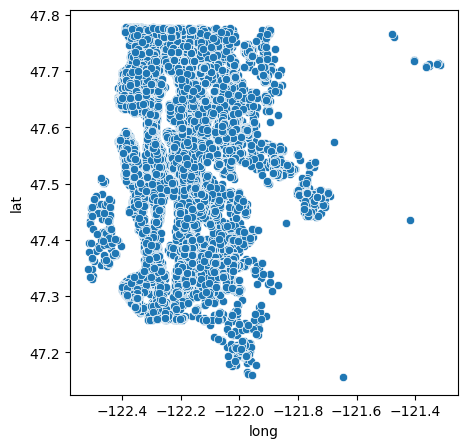

In [18]:
# plot coordinates
plt.figure(figsize = (5,5))
sns.scatterplot(x=df['long'], y=df['lat'])

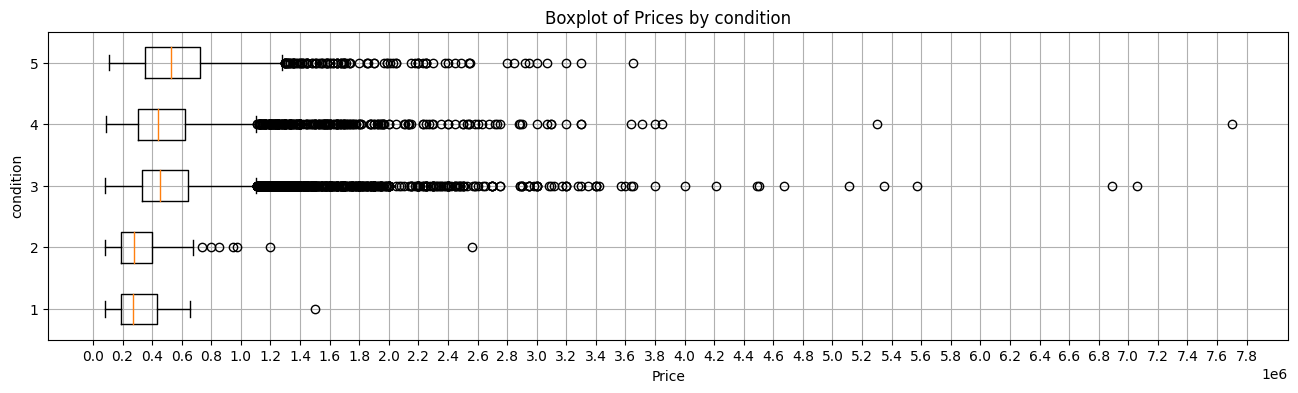

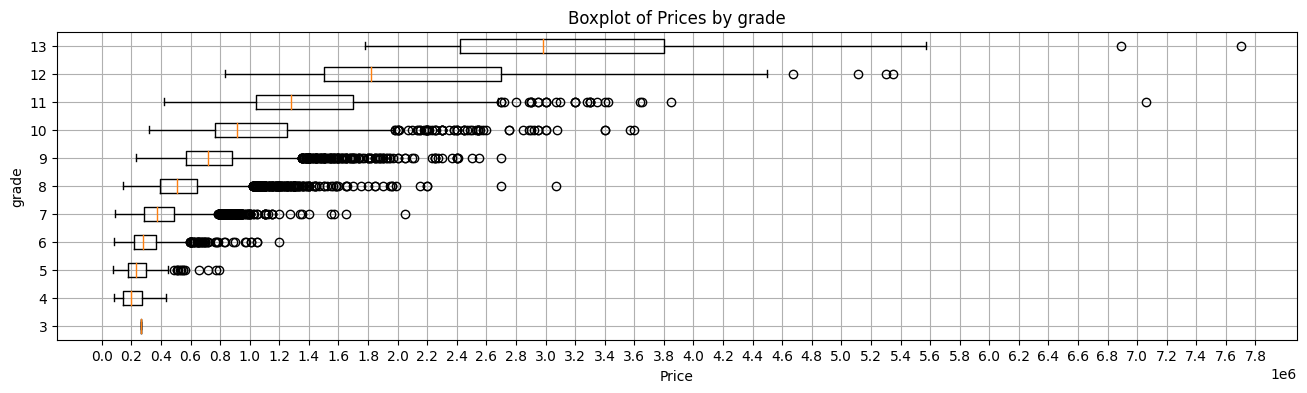

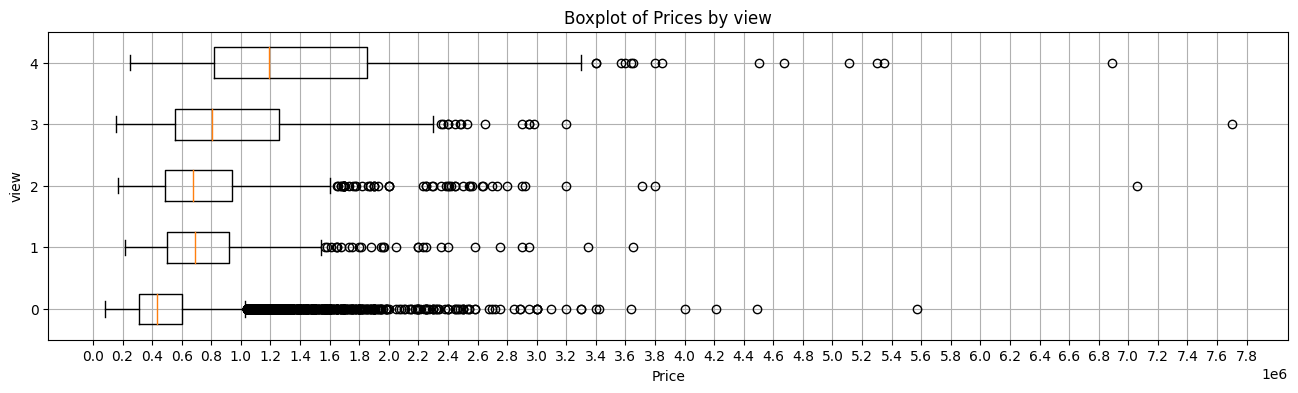

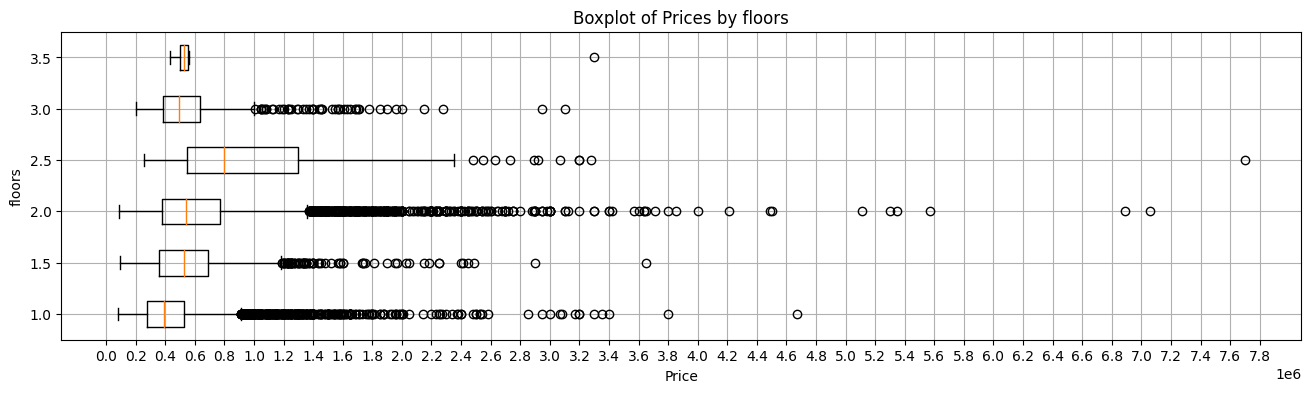

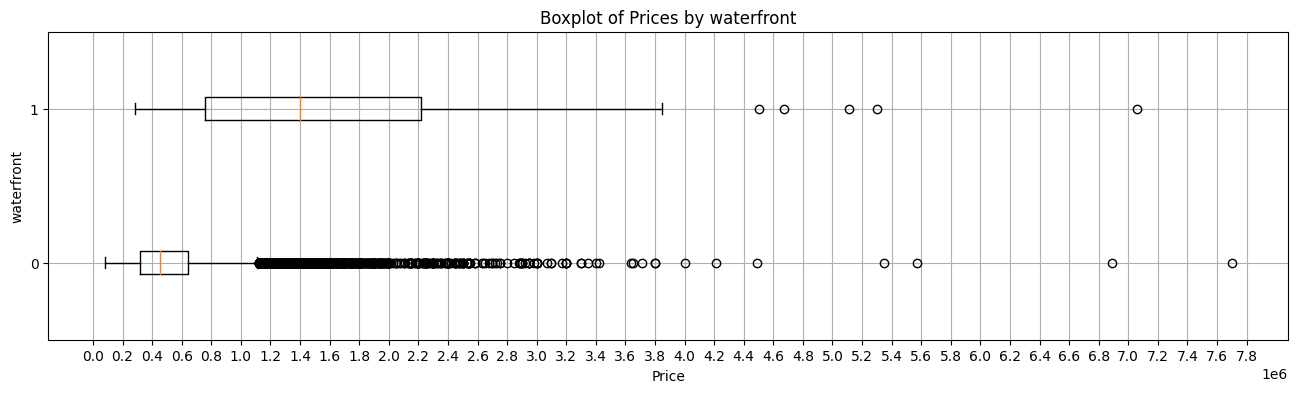

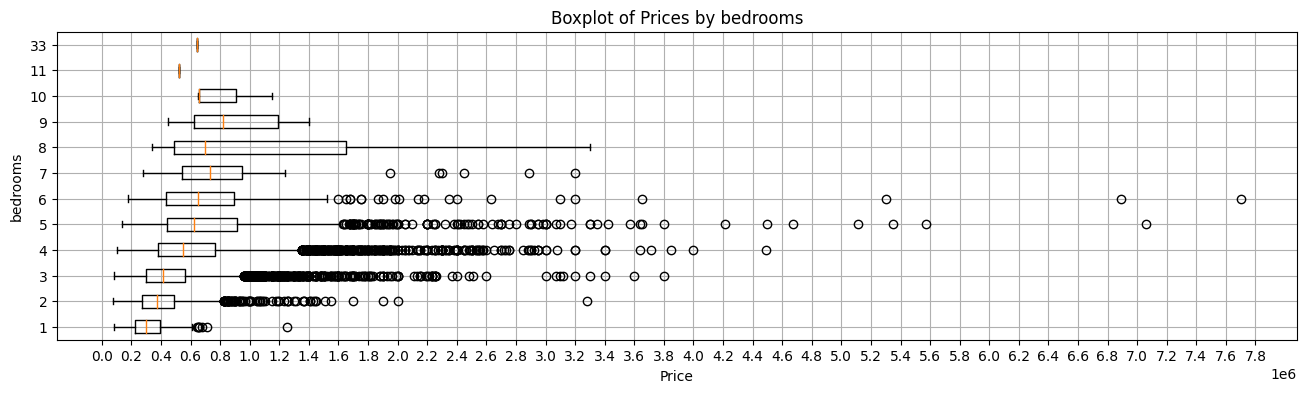

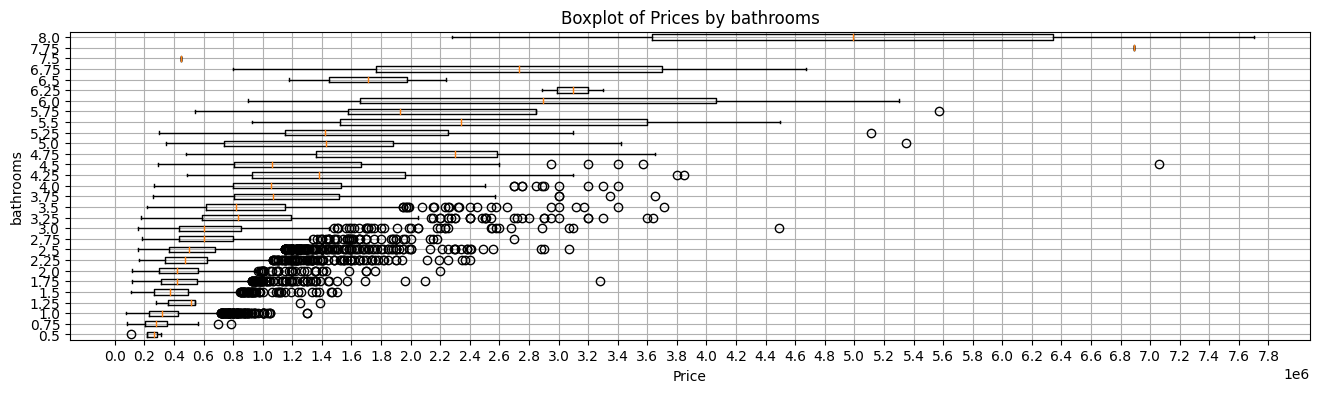

In [20]:
# get boxplots
def get_boxplot(df, groupby_item):

    grouped_data = df.groupby(groupby_item)['price'].apply(list)
    plt.figure(figsize=(16, 4))
    plt.boxplot(grouped_data, vert=False)
    plt.xlabel('Price')
    plt.ylabel(groupby_item)
    plt.title(f'Boxplot of Prices by {groupby_item}')
    plt.yticks(range(1, len(grouped_data) + 1), grouped_data.index)
    plt.xticks(range(0, 8_000_000, 200_000))
    plt.grid(True)
    plt.show()

groupby_items = ['condition', 'grade', 'view', 'floors', 'waterfront', 'bedrooms', 'bathrooms']
for item in groupby_items:
    get_boxplot(import_data(), item)



### Data Observations <a class="anchor" id="observations"></a>

- __Missing and Problematic Data__
    - there are no cells with nulls / missing data
    - the data in some columns is very skewed - there are also clearly some outliers. 
    - plotting the 'lat' and 'long' data above and [on a map in Tableau](https://public.tableau.com/app/profile/arne.thielenhaus/viz/KingCountyHousingPrices_16902761948780/MapKingCountyPropertiesandZipCodes#2) also shows that we have geographic outliers and properties located in special circumstances (ex: on islands without road access to mainland). 
    - We should probably convert 'lat' and 'long'. 'zipcode' would also need to be encoded
    - 'yr_renovated' contains either 0 value or a year --> needs to be dealt with.


- __Correlations / Relevance__
    - 'id' can be removed
    - the various square footage features and 'grade' appear to be most highly correlated with price
    - 'sqr. ft living' and 'sqr. ft above' are highly correlated, perhaps only one of these features is necessary. They are both also highly correlated with 'grade', but as 'grade' is something very different, 'grade' should be kept
    - there may be a non-linear relationship between 'floors' and 'price'


- __Data Types__
    - the only clear categorical variables are the location features 'zipcode', 'lat' and 'long'
    - according to Kaggle, the 'grade' reflects the structure, furnishings, and construction of the house, while the 'condition' indicates its current state. They are ordinal and can be treated as either numerical or categorical
    - number of floors, number of bedrooms and number of bathrooms can be considered categorical or numerical so it could be worth trying both
    - 'yr_built' and 'yr_renovated' are technically numerical, but both could be converted to an 'age' type, or binned


- __Input from internet research__  
    - Some factors which typically influence house value include:
        - Prices of comparable properties
        - Age and condition
        - Property size / usable space
        - Neighborhood / location (crime rate, schools, view, parking availability...)
        - Upgrades
    - Sources:
        - https://www.opendoor.com/articles/factors-that-influence-home-value
        - https://www.experian.com/blogs/ask-experian/factors-that-affect-home-value/

#### Basic data prep functions

In [14]:
# Drop unneccesary columns
def preprocess_df(df):
    df_new = df.copy()
    df_new = df_new.drop(['id', 'date'], axis= 1)
    return df_new

# function to drop lat and long columns
def remove_lat_long(df):
    df_new = df.copy()
    df_new.drop(['lat', 'long'], axis=1, inplace=True)
    return df_new

# create some functions to prep data
def prep_data():
    df = import_data().pipe(preprocess_df)
    return df

def prep_data_long():
    df = import_data().pipe(preprocess_df).pipe(remove_lat_long)
    return df



## Feature Engineering and Selection   <a class="anchor" id="feature-engineering"></a>
In this section we focus on experimenting with different data transformations / manipulations so that we can improve model performance. These include:
- removing outliers
- testing encoding of zipcode vs creation of geoclusters with KMeans
- removing features
- creating new features via binning
- testing different combinations of categorical / numerical variables 